<a href="https://colab.research.google.com/github/Satyendra2309/Blood-Cancer-Detection/blob/main/Leukemia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import zipfile
import os

# Path to the uploaded zip file (adjust if needed)
zip_file_path = '/content/drive/MyDrive/Blood cell Cancer [ALL].zip'

# Directory to extract the contents
extract_dir = '/content/drive/MyDrive/Blood cell Cancer [ALL]'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed. Extracted files:")
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        print(os.path.join(root, file))


Extraction completed. Extracted files:
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (1).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (10).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (11).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (12).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (13).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (14).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (15).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (16).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (17).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (18).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (19).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (2).jpg
/content/drive/MyDrive/Blood cell Cancer [ALL]/Benign/Sap_013 (20).jpg
/content/drive/MyDrive/Blood cell Cancer

# New section

In [7]:
base_dir = r"/content/drive/MyDrive/Blood cell Cancer [ALL]"


In [8]:
categories = {
    'Benign': 'Benign',
    'Malignant_Pre_B': '[Malignant] Pre-B',
    'Malignant_Pro_B': '[Malignant] Pro-B',
    'Malignant_early_Pre_B': '[Malignant] early Pre-B'
}

file_paths = []
labels = []

for label, subfolder in categories.items():
    folder_path = os.path.join(base_dir, subfolder)
    for filename in os.listdir(folder_path):
        file_paths.append(os.path.join(folder_path, filename))
        labels.append(label)

df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})

In [9]:
df.head()

,file_path,label
0,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
1,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
2,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
3,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
4,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign


In [10]:
df.tail()

,file_path,label
3237,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_early_Pre_B
3238,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_early_Pre_B
3239,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_early_Pre_B
3240,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_early_Pre_B
3241,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_early_Pre_B


In [11]:
df.shape

(3242, 2)

In [12]:
df.columns

Index(['file_path', 'label'], dtype='object')

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

,0
file_path,0
label,0


<ipython-input-15-f60f4a72773f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='viridis')


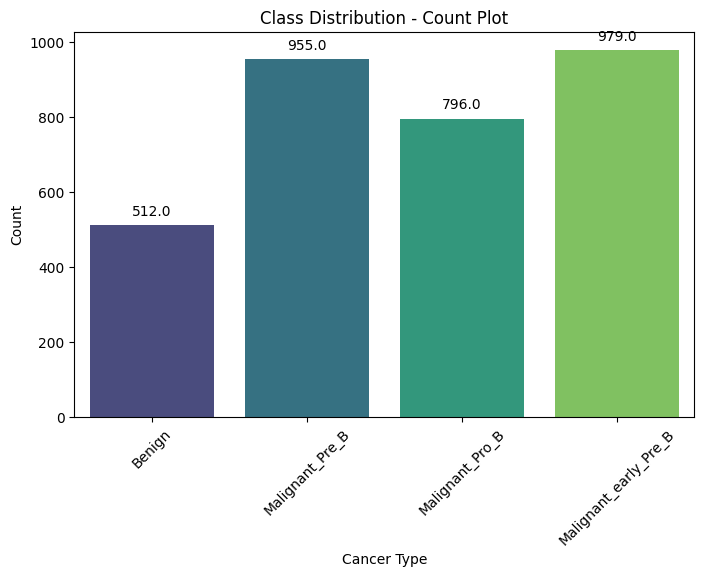

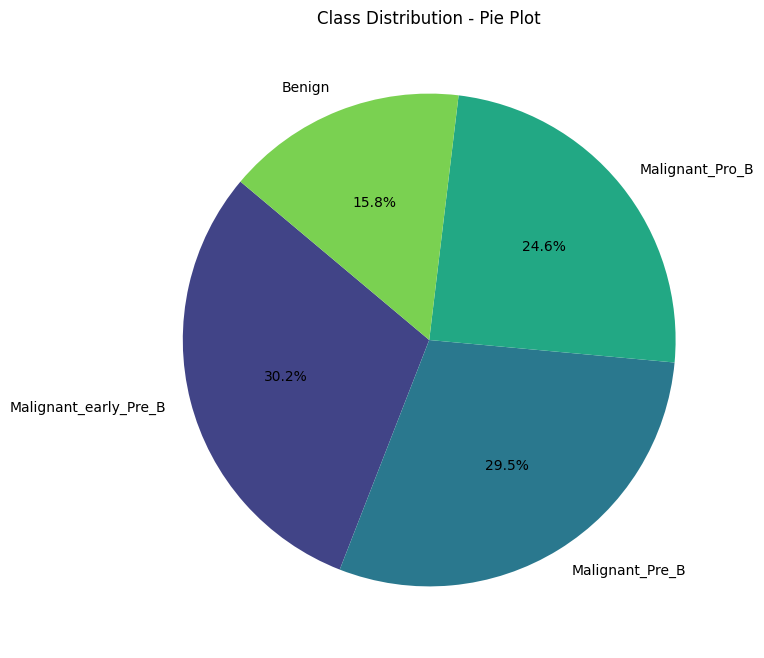

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='label', data=df, palette='viridis')
plt.title('Class Distribution - Count Plot')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

plt.figure(figsize=(8, 8))
labels = df['label'].value_counts().index
sizes = df['label'].value_counts().values
colors = sns.color_palette('viridis', len(labels))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution - Pie Plot')
plt.show()

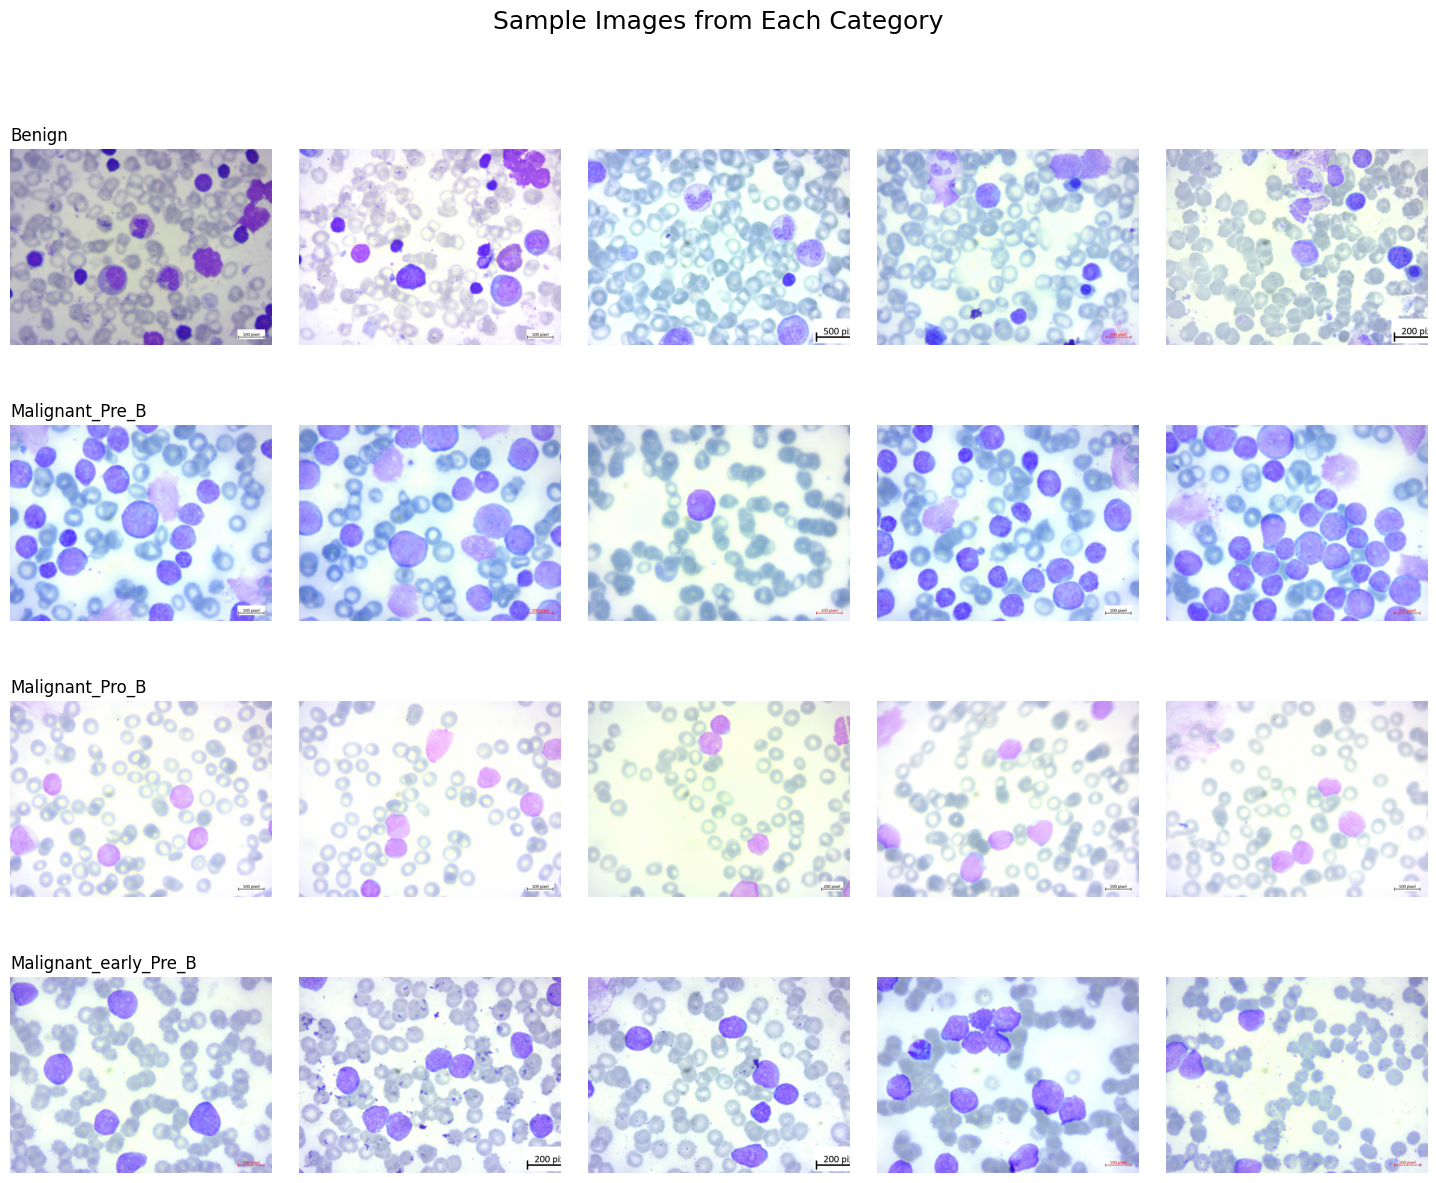

In [16]:
import random
from PIL import Image

num_images = 5

fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 12))
fig.suptitle('Sample Images from Each Category', fontsize=18, y=1.02, ha='center')

for i, (label, subfolder) in enumerate(categories.items()):
    category_images = df[df['label'] == label]['file_path'].tolist()
    selected_images = random.sample(category_images, num_images)

    for j, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')

        if j == 0:
            axes[i, j].set_title(label, fontsize=12, loc='left')

plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=5.0)
plt.subplots_adjust(top=0.92)
plt.show()

In [17]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.1 MB/s eta 0:00:00


In [18]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['file_path']], df['label'])

In [19]:
df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
df_resampled['label'] = y_resampled

In [20]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
Benign                   979
Malignant_Pre_B          979
Malignant_Pro_B          979
Malignant_early_Pre_B    979
Name: count, dtype: int64


In [21]:
df_resampled

,file_path,label
0,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
1,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
2,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
3,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
4,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign
...,...,...
3911,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B
3912,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B
3913,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B
3914,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_resampled['label_encoded'] = le.fit_transform(df_resampled['label'])

In [23]:
df_resampled

,file_path,label,label_encoded
0,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign,0
1,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign,0
2,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign,0
3,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign,0
4,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Benign,0
...,...,...,...
3911,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B,2
3912,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B,2
3913,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B,2
3914,/content/drive/MyDrive/Blood cell Cancer [ALL]...,Malignant_Pro_B,2


In [24]:
df_resampled['label_encoded'].unique()

array([0, 1, 2, 3])

In [25]:
df_resampled['label_encoded'].value_counts()

,count
label_encoded,
0,979
1,979
2,979
3,979


In [26]:
df_resampled = df_resampled[['file_path', 'label_encoded']]

In [27]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [28]:
df_resampled['label_encoded'] = df_resampled['label_encoded'].astype(str)

In [29]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label_encoded']
)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',
    y_col='label_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',
    y_col='label_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path',
    y_col='label_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 3132 validated image filenames belonging to 4 classes.
Found 392 validated image filenames belonging to 4 classes.
Found 392 validated image filenames belonging to 4 classes.


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [34]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inceptionv3_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inceptionv3_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [35]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
196/196 [==============================] - 187s 932ms/step - loss: 0.4121 - accuracy: 0.8519 - val_loss: 3.2524 - val_accuracy: 0.4617
Epoch 2/5
196/196 [==============================] - 182s 926ms/step - loss: 0.2118 - accuracy: 0.9262 - val_loss: 0.2691 - val_accuracy: 0.9082
Epoch 3/5
196/196 [==============================] - 183s 932ms/step - loss: 0.1277 - accuracy: 0.9556 - val_loss: 1.0715 - val_accuracy: 0.7041
Epoch 4/5
196/196 [==============================] - 183s 931ms/step - loss: 0.1052 - accuracy: 0.9630 - val_loss: 0.3859 - val_accuracy: 0.8852
Epoch 5/5
196/196 [==============================] - 182s 929ms/step - loss: 0.0605 - accuracy: 0.9828 - val_loss: 0.1210 - val_accuracy: 0.9694


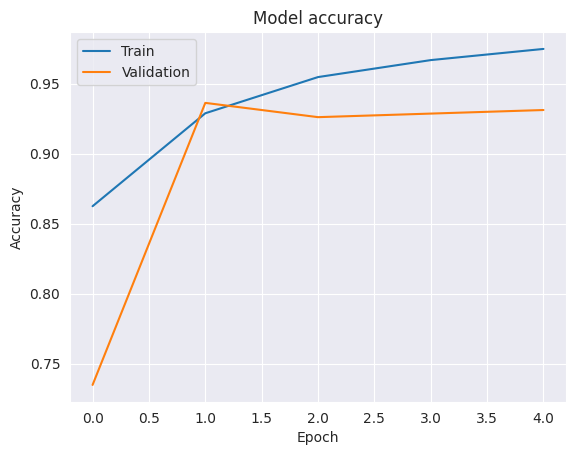

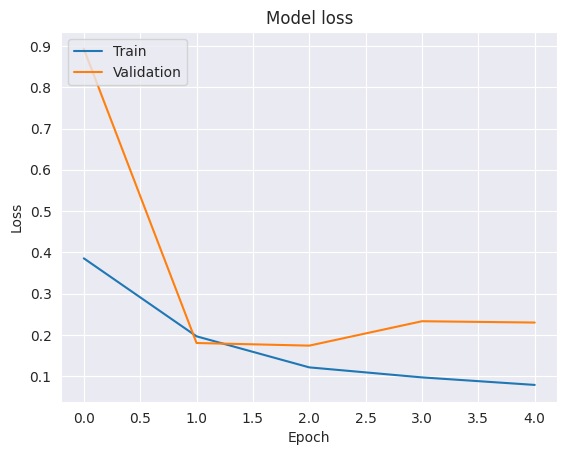

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

25/25 [==============================] - 10s 341ms/step


In [35]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        98
           1       1.00      0.93      0.96        98
           2       1.00      0.94      0.97        98
           3       0.88      0.99      0.93        98

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



In [36]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

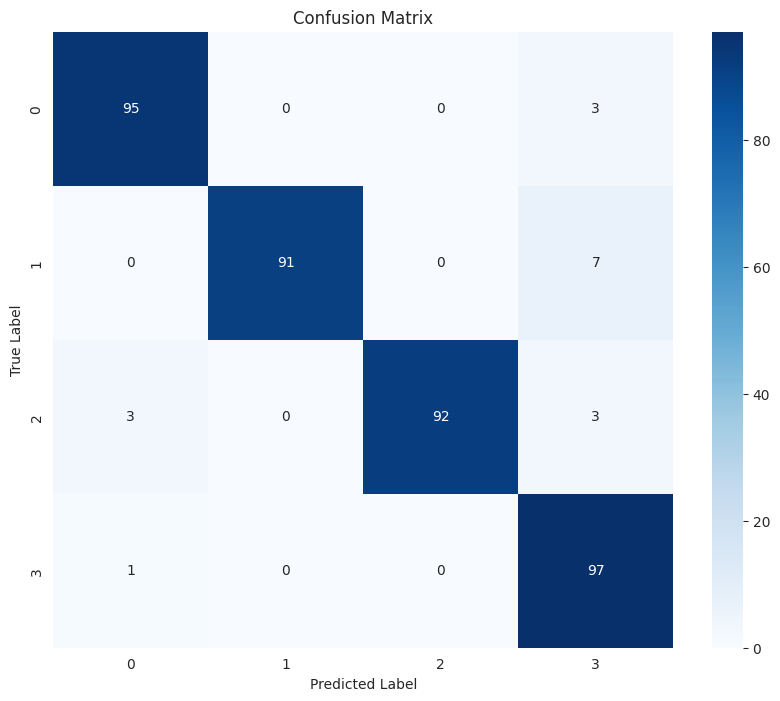

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [39]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
196/196 [==============================] - 269s 1s/step - loss: 0.2895 - accuracy: 0.9004 - val_loss: 0.3039 - val_accuracy: 0.8878
Epoch 2/5
196/196 [==============================] - 273s 1s/step - loss: 0.1357 - accuracy: 0.9524 - val_loss: 0.1302 - val_accuracy: 0.9490
Epoch 3/5
196/196 [==============================] - 267s 1s/step - loss: 0.0980 - accuracy: 0.9671 - val_loss: 0.3040 - val_accuracy: 0.8852
Epoch 4/5
196/196 [==============================] - 266s 1s/step - loss: 0.0735 - accuracy: 0.9751 - val_loss: 0.3444 - val_accuracy: 0.8903
Epoch 5/5
196/196 [==============================] - 265s 1s/step - loss: 0.0742 - accuracy: 0.9773 - val_loss: 0.3509 - val_accuracy: 0.8929


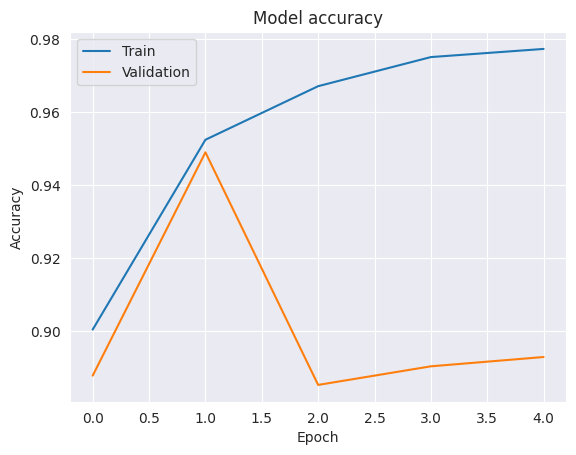

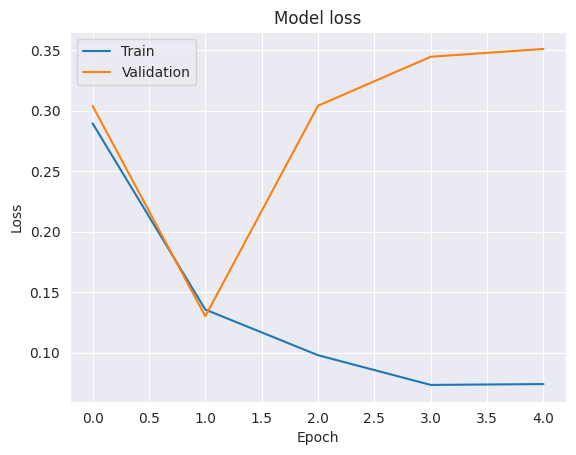

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

25/25 [==============================] - 13s 497ms/step


In [42]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        98
           1       0.84      1.00      0.91        98
           2       0.99      0.98      0.98        98
           3       1.00      0.61      0.76        98

    accuracy                           0.90       392
   macro avg       0.91      0.90      0.89       392
weighted avg       0.91      0.90      0.89       392



In [43]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

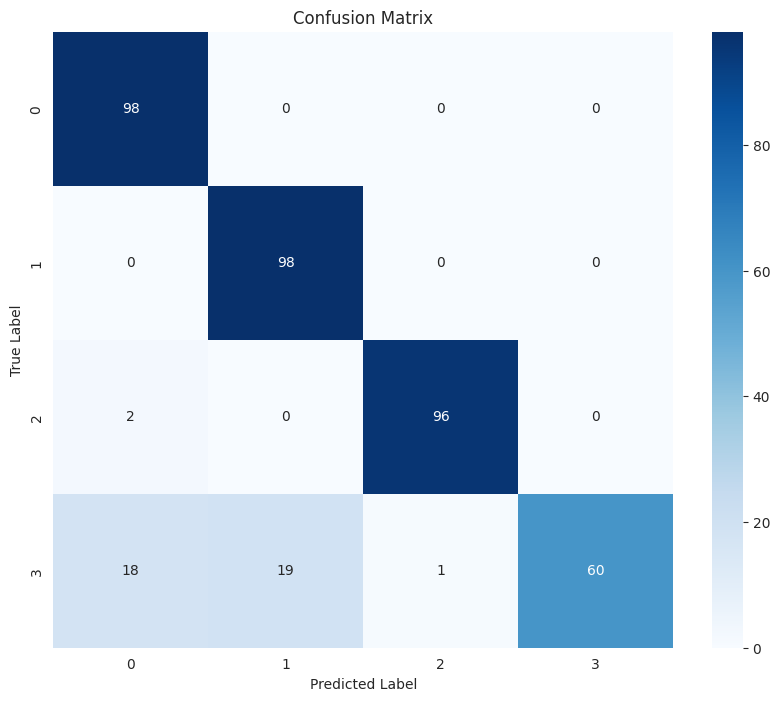

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step


In [47]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
196/196 [==============================] - 82s 403ms/step - loss: 0.2252 - accuracy: 0.9163 - val_loss: 0.1672 - val_accuracy: 0.9515
Epoch 2/5
196/196 [==============================] - 78s 398ms/step - loss: 0.1098 - accuracy: 0.9671 - val_loss: 0.2342 - val_accuracy: 0.9260
Epoch 3/5
196/196 [==============================] - 78s 399ms/step - loss: 0.0572 - accuracy: 0.9792 - val_loss: 0.1311 - val_accuracy: 0.9541
Epoch 4/5
196/196 [==============================] - 79s 401ms/step - loss: 0.0562 - accuracy: 0.9805 - val_loss: 0.0926 - val_accuracy: 0.9694
Epoch 5/5
196/196 [==============================] - 78s 395ms/step - loss: 0.0525 - accuracy: 0.9828 - val_loss: 0.0672 - val_accuracy: 0.9796


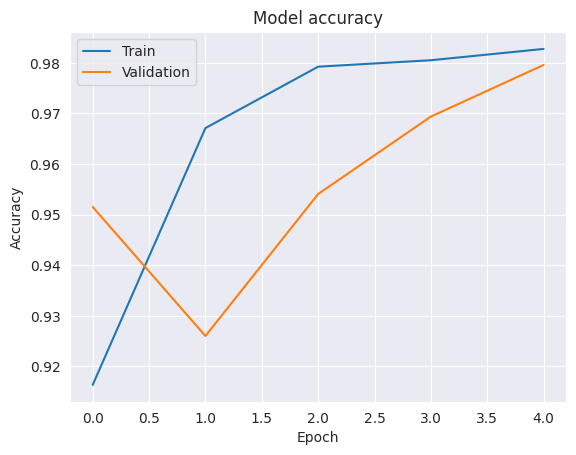

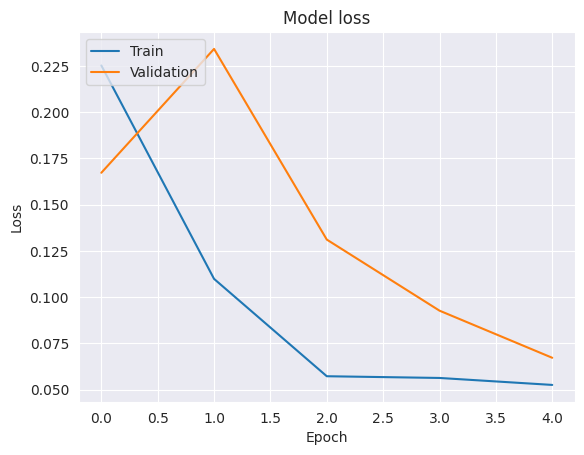

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

25/25 [==============================] - 8s 282ms/step


In [50]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      0.98      0.99        98
           2       0.99      0.99      0.99        98
           3       0.98      1.00      0.99        98

    accuracy                           0.99       392
   macro avg       0.99      0.99      0.99       392
weighted avg       0.99      0.99      0.99       392



In [51]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

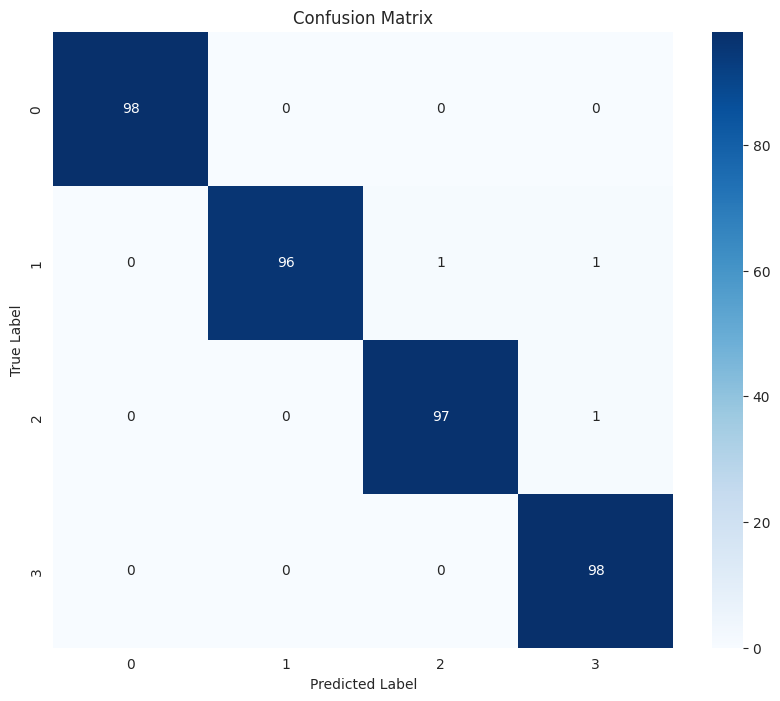

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

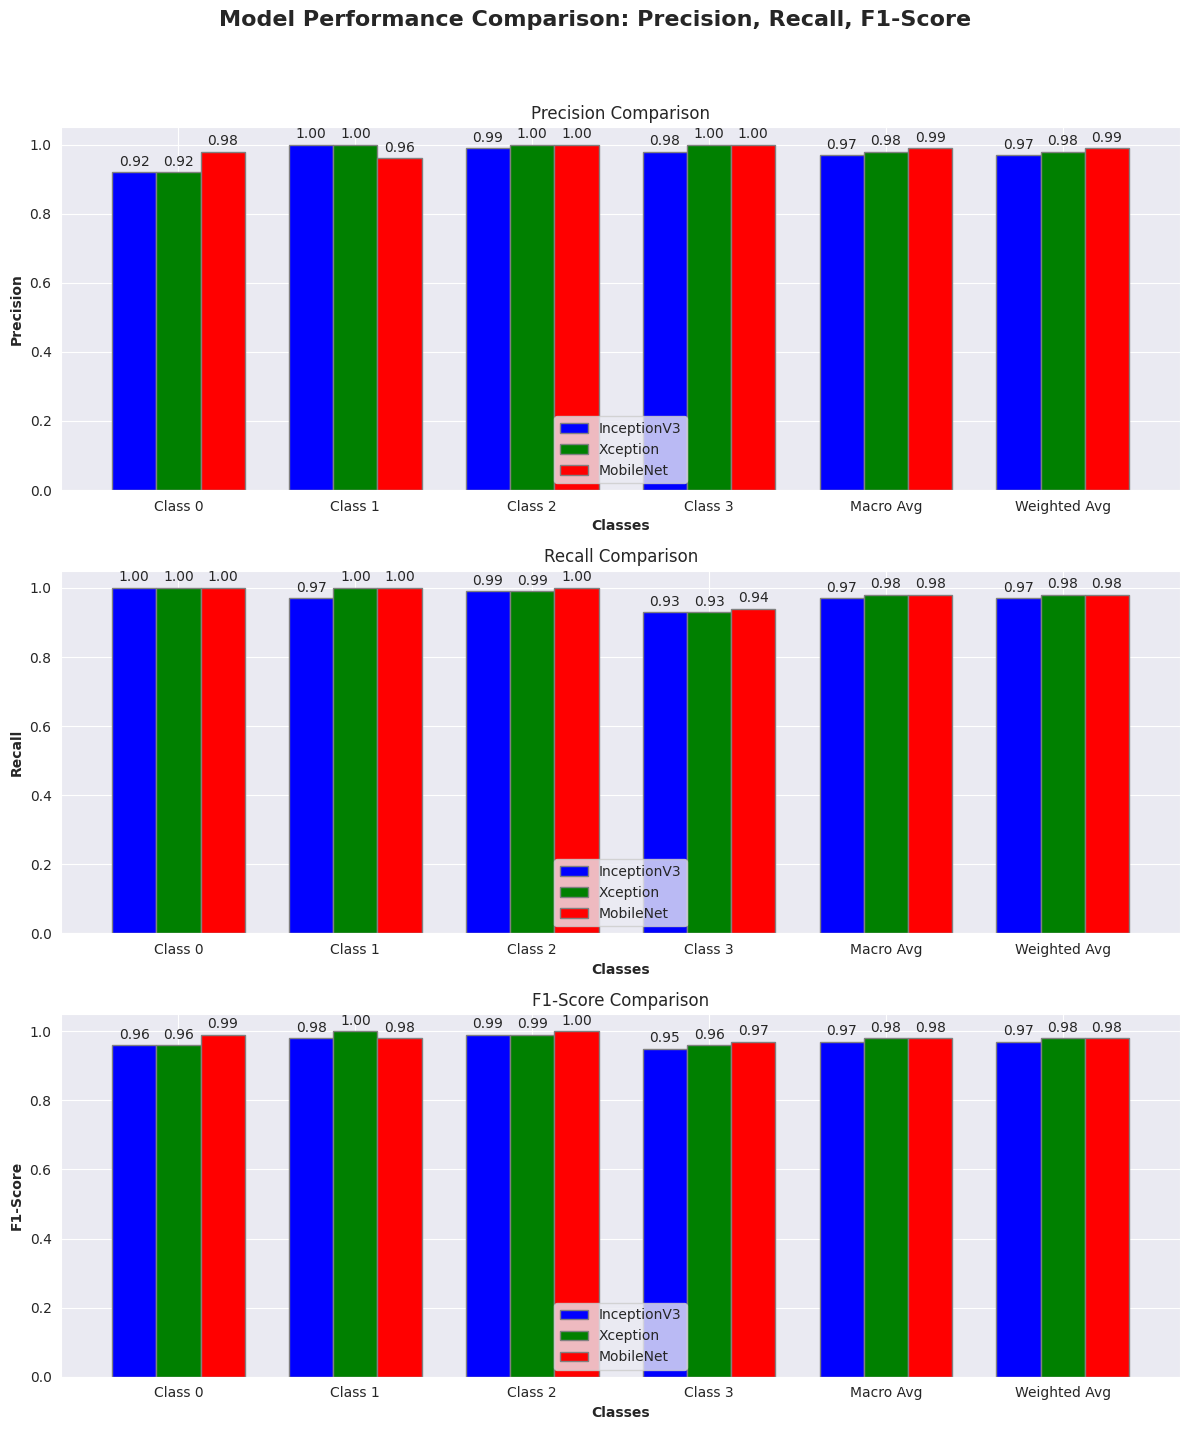

In [53]:
metrics = ['Precision', 'Recall', 'F1-Score']
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Macro Avg', 'Weighted Avg']
inception_scores = [
    [0.92, 1.00, 0.99, 0.98, 0.97, 0.97],
    [1.00, 0.97, 0.99, 0.93, 0.97, 0.97],
    [0.96, 0.98, 0.99, 0.95, 0.97, 0.97]
]
xception_scores = [
    [0.92, 1.00, 1.00, 1.00, 0.98, 0.98],
    [1.00, 1.00, 0.99, 0.93, 0.98, 0.98],
    [0.96, 1.00, 0.99, 0.96, 0.98, 0.98]
]
mobilenet_scores = [
    [0.98, 0.96, 1.00, 1.00, 0.99, 0.99],
    [1.00, 1.00, 1.00, 0.94, 0.98, 0.98],
    [0.99, 0.98, 1.00, 0.97, 0.98, 0.98]
]

bar_width = 0.25
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle("Model Performance Comparison: Precision, Recall, F1-Score", fontsize=16, fontweight='bold')

for i, metric in enumerate(metrics):
    ax[i].bar(r1, inception_scores[i], color='b', width=bar_width, edgecolor='grey', label='InceptionV3')
    ax[i].bar(r2, xception_scores[i], color='g', width=bar_width, edgecolor='grey', label='Xception')
    ax[i].bar(r3, mobilenet_scores[i], color='r', width=bar_width, edgecolor='grey', label='MobileNet')

    ax[i].set_xlabel('Classes', fontweight='bold')
    ax[i].set_ylabel(metric, fontweight='bold')
    ax[i].set_title(f'{metric} Comparison')
    ax[i].set_xticks([r + bar_width for r in range(len(classes))])
    ax[i].set_xticklabels(classes)
    ax[i].legend()

    for bar_container, score_set in zip([r1, r2, r3], [inception_scores[i], xception_scores[i], mobilenet_scores[i]]):
        for bar, score in zip(bar_container, score_set):
            ax[i].text(bar, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [1]:
cnn_model.save('leukemia_classification_model.h5')

NameError: name 'cnn_model' is not defined

In [37]:
from google.colab import files
files.download('leukemia_classification_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>